# Analyzing CIA Factbook Data using SQLite and Python

## Introduction

This is my 9th DataQuest project in the Data Scientist Pathway

This is the 1st DataQuest project in Step 4: Working with Data Sources.

In this project I'll be working with data from the CIA World Factbook. I'll be exploring the data using Python SQLite. 

## Set-up


In [1]:
## Import Packages
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Connect to data source

conn = sqlite3.connect("factbook.db")
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


The above tells us we can access the "factbook.db" by calling on the table name "facts". I'll select the first 5 rows from this table below.

In [2]:
## Show first 5 listings from the table
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Data Investigation


I'll briefly examine the data and look for :

1. Minimum Population
2. Maximum Population
3. Minimum Population Growth
4. Maximum Population Growth



In [3]:
query = '''
SELECT 
MIN(population) as min_pop,
MAX(population) as max_pop,
MIN(population_growth) as min_growth,
MAX(population_growth) as max_growth FROM facts
'''
pd.read_sql_query(query, conn)

#query = "SELECT name, population FROM facts ORDER BY population ASC"
#pd.read_sql_query(query, conn)


,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


There appears to be a country with a population of 0 so I'll examine that now to determine which country(ies) it is.

In [4]:
query = '''
        SELECT name, population FROM facts
        WHERE population < 1
        '''

pd.read_sql_query(query, conn)

,name,population
0,Antarctica,0


The "country" is Antartica.

Now I'll examine the country with 7.25 billion people. This is a bit odd since currently (8/2019), no country has more than 2 billion people.


In [5]:
query = '''
        SELECT name, population FROM facts
        WHERE population > 2000000000
        '''
pd.read_sql_query(query, conn)

,name,population
0,World,7256490011


This country, just like Antartica, isn't a country at all. It's the total world population.

## Data Visualization

Now it's time to create some visual representation of the data. I'll be examining:

1. Population
2. Population Growth
3. Birth Rate
4. Death Rate

In [6]:
## Create Table

query = '''
        SELECT name, population, population_growth, birth_rate, death_rate
        FROM facts
        WHERE name != "Antartica" OR name != "World"
        '''
fact_table = pd.read_sql_query(query, conn)

## Show Table
fact_table.head(5)



,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Albania,3029278.0,0.30,12.92,6.58
2,Algeria,39542166.0,1.84,23.67,4.31
3,Andorra,85580.0,0.12,8.13,6.96
4,Angola,19625353.0,2.78,38.78,11.49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922833bf60>,
      dtype=object)

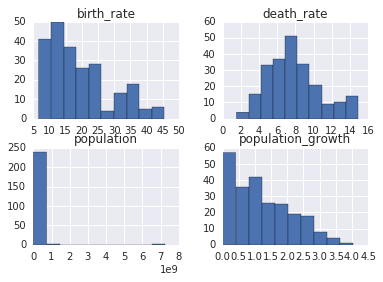

In [7]:
## Create Histograms

fact_table.hist()

As a last step, I'll calculate the population density which is the ratio of population to land area. 

In [8]:
query = '''
        SELECT name, CAST(population as FLOAT)/CAST(area_land as float) as pop_density
        FROM facts
        WHERE name != "World" OR name != "Antartica"
        ORDER BY pop_density DESC
        '''

pop_density_table = pd.read_sql_query(query, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9226178f60>]],
      dtype=object)

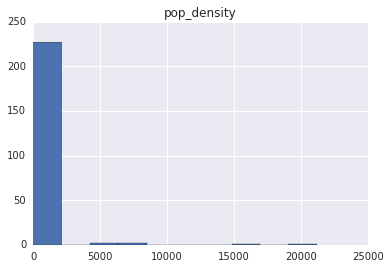

In [9]:
pop_density_table.hist()

In [10]:
pop_density_table.head(10)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
